In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


In [2]:
data = pd.DataFrame(pd.read_csv('Dump.csv'))
data.head(5) 

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [3]:
print("Size of the Dataset",data.shape)

Size of the Dataset (46608, 16)


In [4]:
data.describe()

,Unnamed: 0
count,46608.00000
mean,23303.50000
std,13454.71501
min,0.00000
25%,11651.75000
50%,23303.50000
75%,34955.25000
max,46607.00000


# Preprocessing

In [5]:
#checking duplicates
data.duplicated(subset = 'Agent_id')
# No duplicate values

0        False
1        False
2        False
3        False
4         True
         ...  
46603     True
46604     True
46605     True
46606     True
46607     True
Length: 46608, dtype: bool

In [6]:
data=data.drop_duplicates(subset=['Agent_id','lead_id'])

In [7]:
print("After removing duplicates , Size of the Dataset",data.shape)

After removing duplicates , Size of the Dataset (45947, 16)


In [8]:
data.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3351
budget             3598
lease              2291
movein            13303
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23076
lead_id               0
dtype: int64

But This '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' represents NaN and 
could be present in more than one column

In [9]:
# Converting '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' values to NaN.
data = data.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

In [10]:
data.isnull().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3351
budget             3598
lease              2291
movein            13303
source             5810
source_city        8676
source_country     8473
utm_source           60
utm_medium         3138
des_city           2469
des_country        2469
room_type         23076
lead_id               0
dtype: int64

In [11]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Unnamed: 0         0.00
Agent_id           0.00
status             0.00
lost_reason        7.29
budget             7.83
lease              4.99
movein            28.95
source            12.65
source_city       18.88
source_country    18.44
utm_source         0.13
utm_medium         6.83
des_city           5.37
des_country        5.37
room_type         50.22
lead_id            0.00
dtype: float64

In [12]:

# delete all rows with column 'Age' has value 30 to 40
data.drop(data[data['status'] == 'OPPORTUNITY'].index, inplace = True)


data.head(15)

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,NaN,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...
5,5,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Wants private accommodation,120,semester-stay,NaN,7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4db...,7b7f15f9ffbeb905caaee265ac39d267d0512ab5333f2f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,f19d051291d4364989e4e957ef610448af3e05863ee1b8...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b26f82b657d94e19ef8382877006c3e9425d7e4ab836f9...
6,6,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Short stay,0-0,0,NaN,9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d79...,3c1def48af45cb9748302f34e57f2cbeb866de95beb0d2...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,7ea9868bb6b4ebe610b0e509950b10322bcb7241d4a101...
7,7,44864c96fa1c36602f0d045b268981b6cab638a60fc207...,LOST,Wants private accommodation,£181 - £240 Per Week,51,08/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,8593b9db65212160979d946950601c26622a219c80f1f1...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,8593b9db65212160979d946950601c26622a219c80f1f1...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Entire Place,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
8,8,ab6bb4584e9946b135dca2e39d12abba3ea82d5ea927d0...,LOST,Low budget,100,Semester Stay 20 - 24 weeks,NaN,869105a4ce02fc56897c8d7e1eb37736b95e3e826568ae...,4fa64bd55d5c0c1f83015952b4b9500cb099dd0b1b0464...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c

In [14]:
data.drop(data[data['status'] == 'IMPORTANT'].index, inplace = True)
data.drop(data[data['status'] == 'CONTACTED'].index, inplace = True)

In [15]:
print("After removing OPPORTUNITY,CONTACTED,IMPORTANT , Size of the Dataset",data.shape)

After removing OPPORTUNITY,CONTACTED,IMPORTANT , Size of the Dataset (45665, 16)


## Handelling Missing Values - room_type

In [16]:
data['room_type'].describe()

count       22642
unique          5
top       Ensuite
freq        12277
Name: room_type, dtype: object

Since room_type column has around 50% missing values and top most value os Ensuite.It is better to null values taken as others.

In [17]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
data['room_type'] = data['room_type'].replace(np.nan, 'Others')

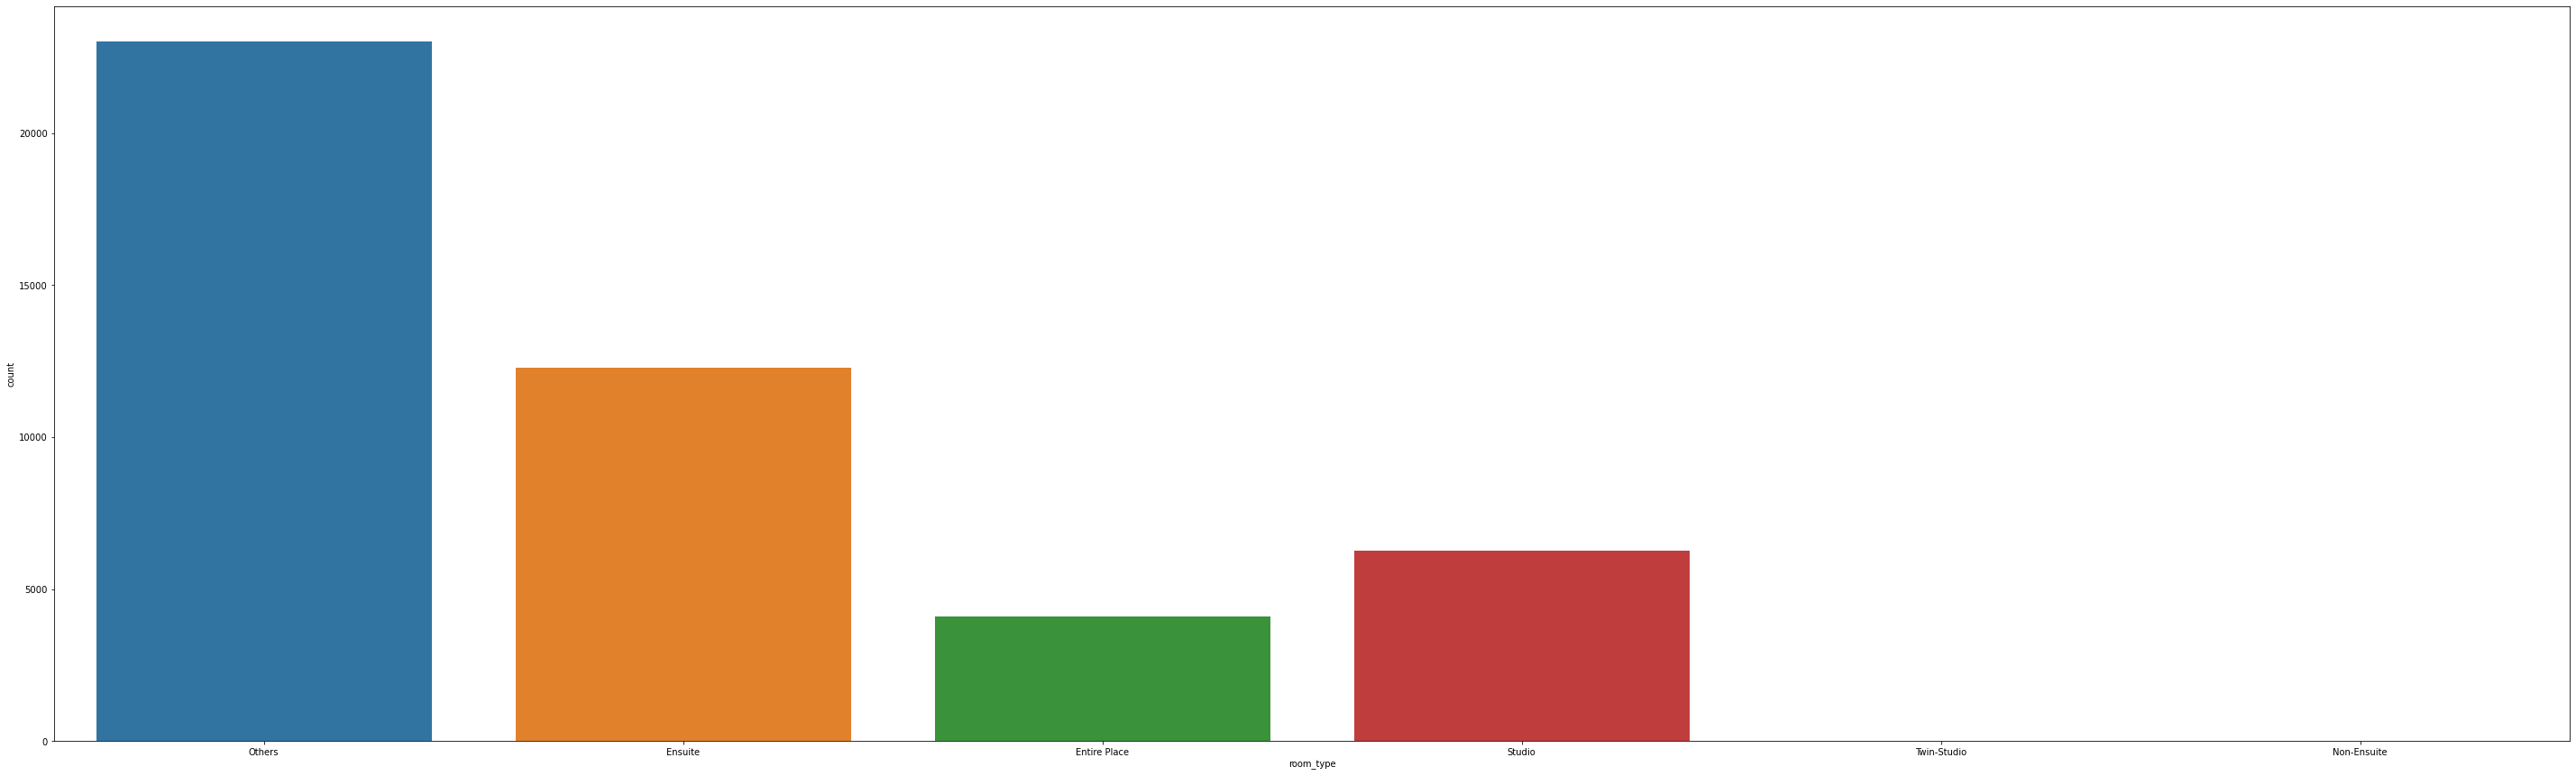

In [18]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(50, 15))
 

sns.countplot(data['room_type'],ax=ax)
plt.show()

## Handelling Missing Values - source_city,source_country,des_city,des_country

In [19]:
data['source_city'].describe()

count                                                 37008
unique                                                 4274
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                   2991
Name: source_city, dtype: object

In [20]:
data['des_city'].describe()

count                                                 43204
unique                                                  216
top       ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...
freq                                                   7292
Name: des_city, dtype: object

In [21]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
data['source_city'] = data['source_city'].replace(np.nan, 'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7')
data['des_city'] = data['des_city'].replace(np.nan, 'ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7')


In [22]:
data['source_country'].describe()

count                                                 37210
unique                                                  183
top       e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...
freq                                                  18456
Name: source_country, dtype: object

In [23]:
data['source_country'] = data['source_country'].replace(np.nan, 'e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96')

In [24]:
data['des_country'].describe()

count                                                 43204
unique                                                   14
top       8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
freq                                                  41875
Name: des_country, dtype: object

In [25]:

data['des_country'] = data['des_country'].replace(np.nan, '8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19')


## Handeling Date(Movein) Missing Values

In [26]:
data['movein'].describe()

count        32388
unique         468
top       10/09/22
freq          2423
Name: movein, dtype: object

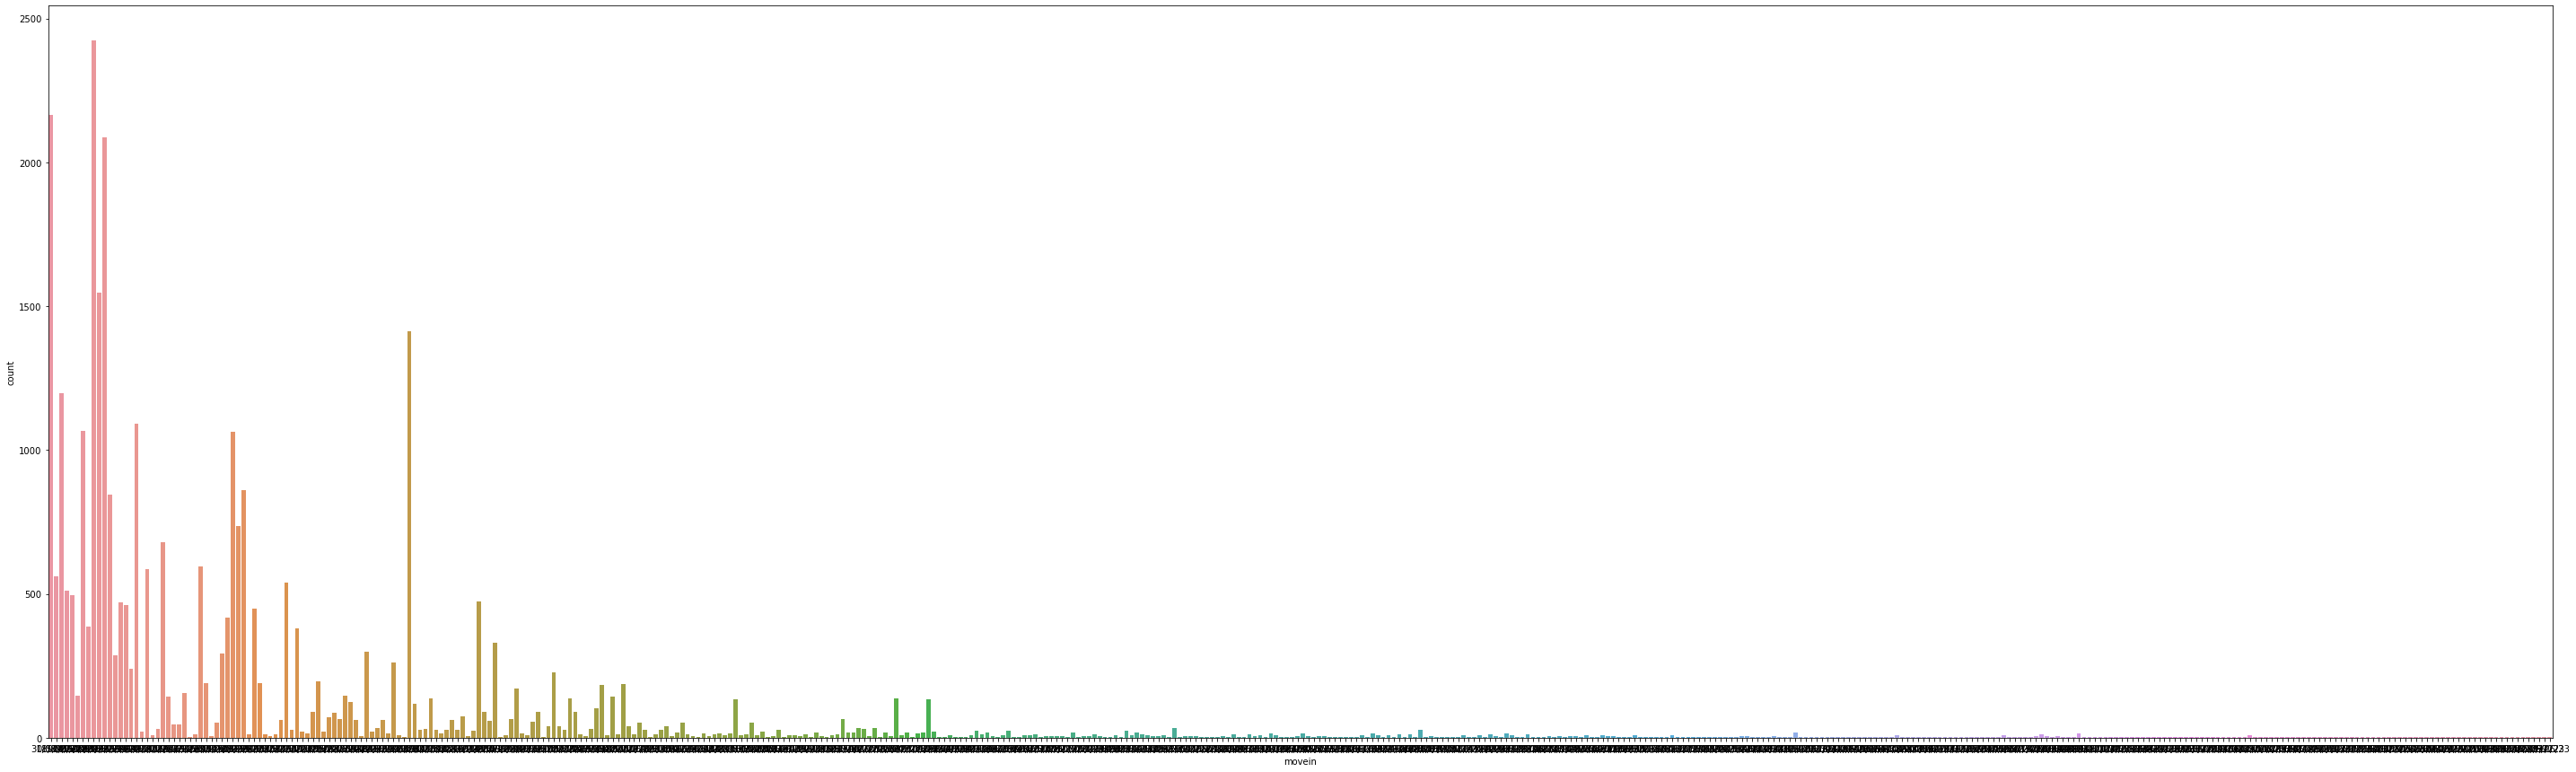

In [27]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(50, 15))
 

sns.countplot(data['movein'],ax=ax)
plt.show()

Substituting missing date values by random date values between "01/08/2022" and "30/09/2022"

In [28]:
from datetime import datetime
import random

def random_date(first_date, second_date):
    first_timestamp = int(first_date.timestamp())
    second_timestamp = int(second_date.timestamp())
    random_timestamp = random.randint(first_timestamp, second_timestamp)
    return datetime.fromtimestamp(random_timestamp)

d1 = datetime.strptime("01/08/2022", "%d/%m/%Y")
d2 = datetime.strptime("30/09/2022", "%d/%m/%Y")

x=random_date(d1, d2)
print(x.strftime("%d/%m/%Y"))

25/08/2022


In [29]:
print(type(data['movein']))

list(data['movein'])
print(type(data['movein']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [30]:
data['movein'] = data['movein'].replace(np.nan, 'null')

new=[]
for i in data['movein']:
    
    if i == "null" :
       x1=random_date(d1, d2)
       x=x1.strftime("%d/%m/%Y")
       new.append(x)
    else:  
       x  = i
       new.append(x)
       
print(new)      
    

['22/09/2022', '05/09/2022', '31/08/22', '06/09/2022', '23/08/2022', '19/09/2022', '04/09/2022', '08/09/22', '26/09/2022', '23/09/2022', '29/08/2022', '15/09/22', '02/09/22', '04/09/22', '29/09/2022', '31/08/2022', '17/09/2022', '31/08/22', '09/08/22', '08/09/2022', '31/08/22', '28/09/2022', '25/09/2022', '15/09/22', '16/09/22', '08/08/2022', '30/08/22', '07/09/2022', '23/09/2022', '31/08/2022', '10/09/22', '15/09/22', '17/09/2022', '23/08/2022', '22/08/2022', '05/08/2022', '19/09/2022', '11/09/2022', '30/08/22', '09/09/22', '21/08/2022', '20/09/2022', '21/08/2022', '01/08/2022', '10/09/22', '10/09/22', '10/09/22', '25/08/2022', '10/08/2022', '24/09/2022', '01/09/22', '29/09/2022', '21/08/2022', '04/09/2022', '31/08/22', '18/09/22', '02/08/2022', '12/09/2022', '23/09/2022', '16/08/2022', '17/08/2022', '06/09/22', '11/09/2022', '02/09/22', '19/09/2022', '30/09/22', '03/09/2022', '25/09/22', '20/09/2022', '09/09/2022', '31/08/22', '26/08/2022', '09/09/22', '29/09/22', '14/09/22', '14/09/

In [31]:
data["movein"]=new #substitute new date colume with Data(['movein'])

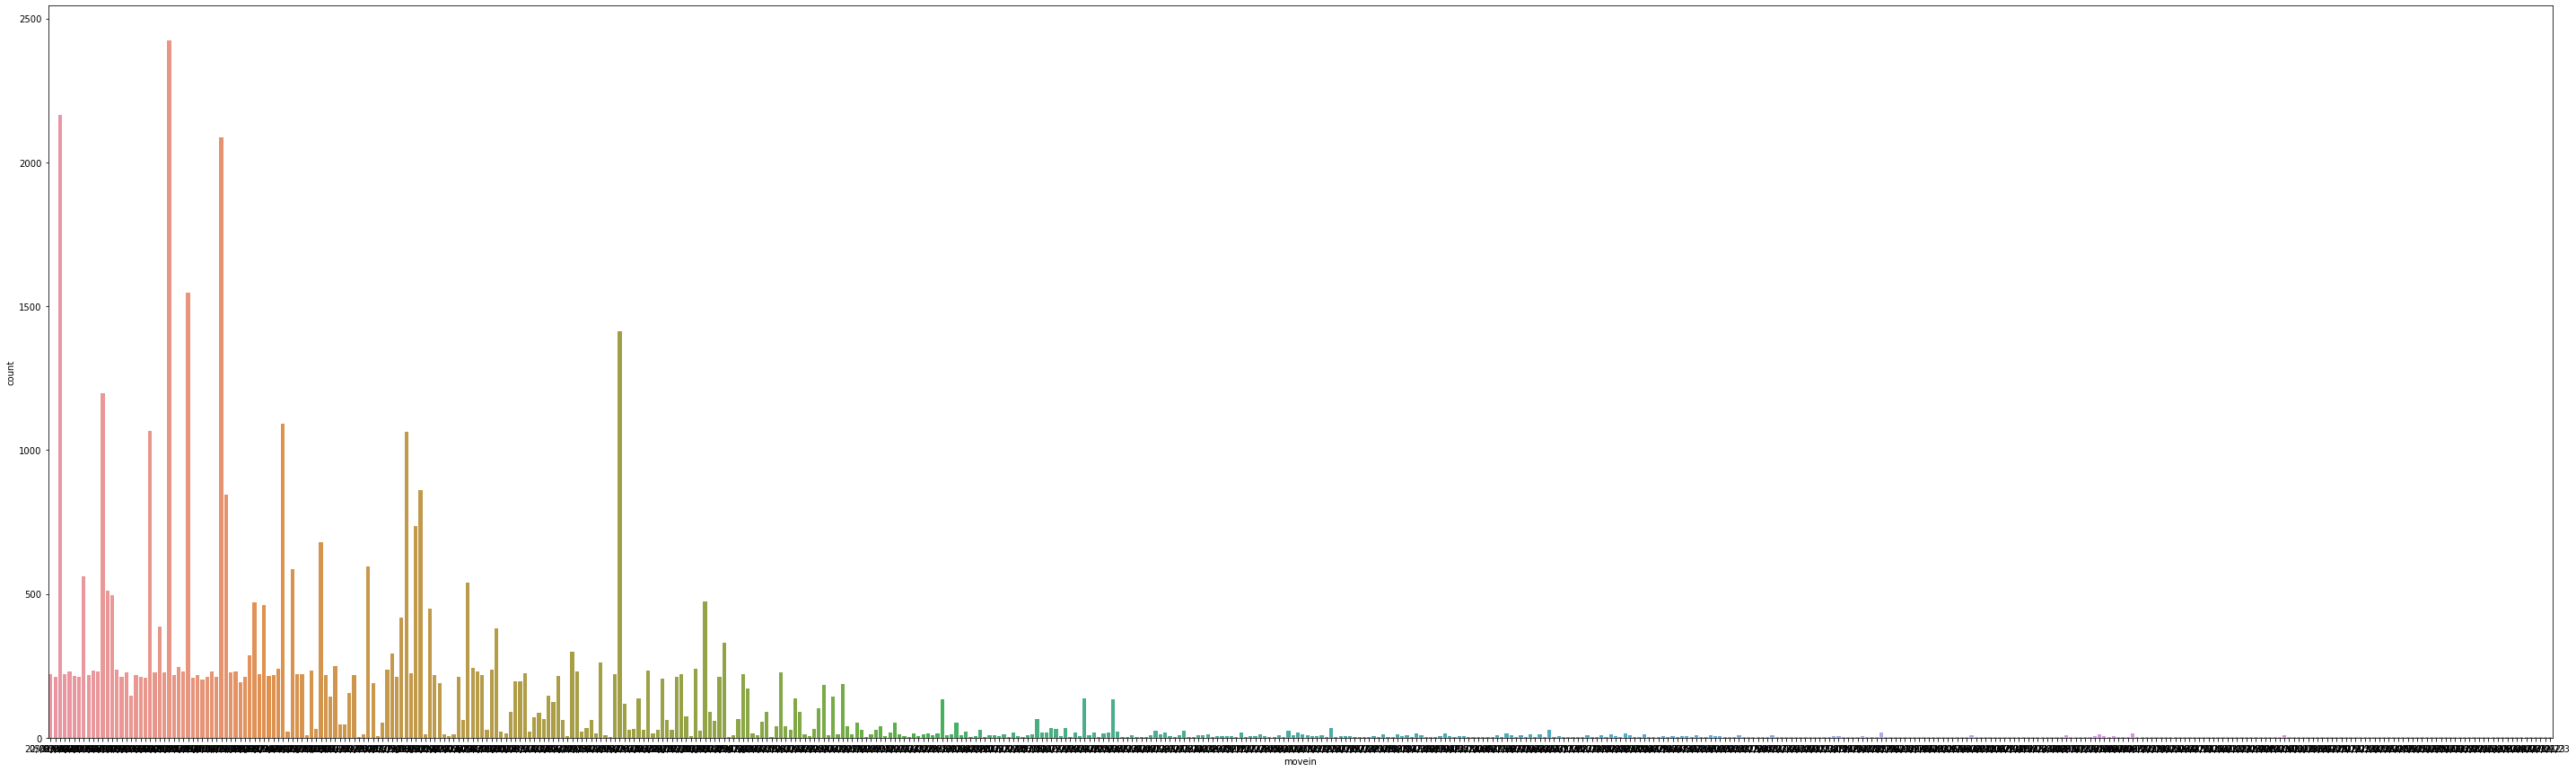

In [32]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(50, 15))
 

sns.countplot(data['movein'],ax=ax)
plt.show()

In [33]:
data['source'].describe()

count                                                 39881
unique                                                  677
top       7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...
freq                                                  19006
Name: source, dtype: object

In [34]:
data['source'] = data['source'].replace(np.nan, '7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c')



In [35]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Unnamed: 0        0.00
Agent_id          0.00
status            0.00
lost_reason       6.72
budget            7.87
lease             5.01
movein            0.00
source            0.00
source_city       0.00
source_country    0.00
utm_source        0.13
utm_medium        6.87
des_city          0.00
des_country       0.00
room_type         0.00
lead_id           0.00
dtype: float64

In [36]:
data['lost_reason'].describe()

count                42596
unique                  30
top       Low availability
freq                  8419
Name: lost_reason, dtype: object

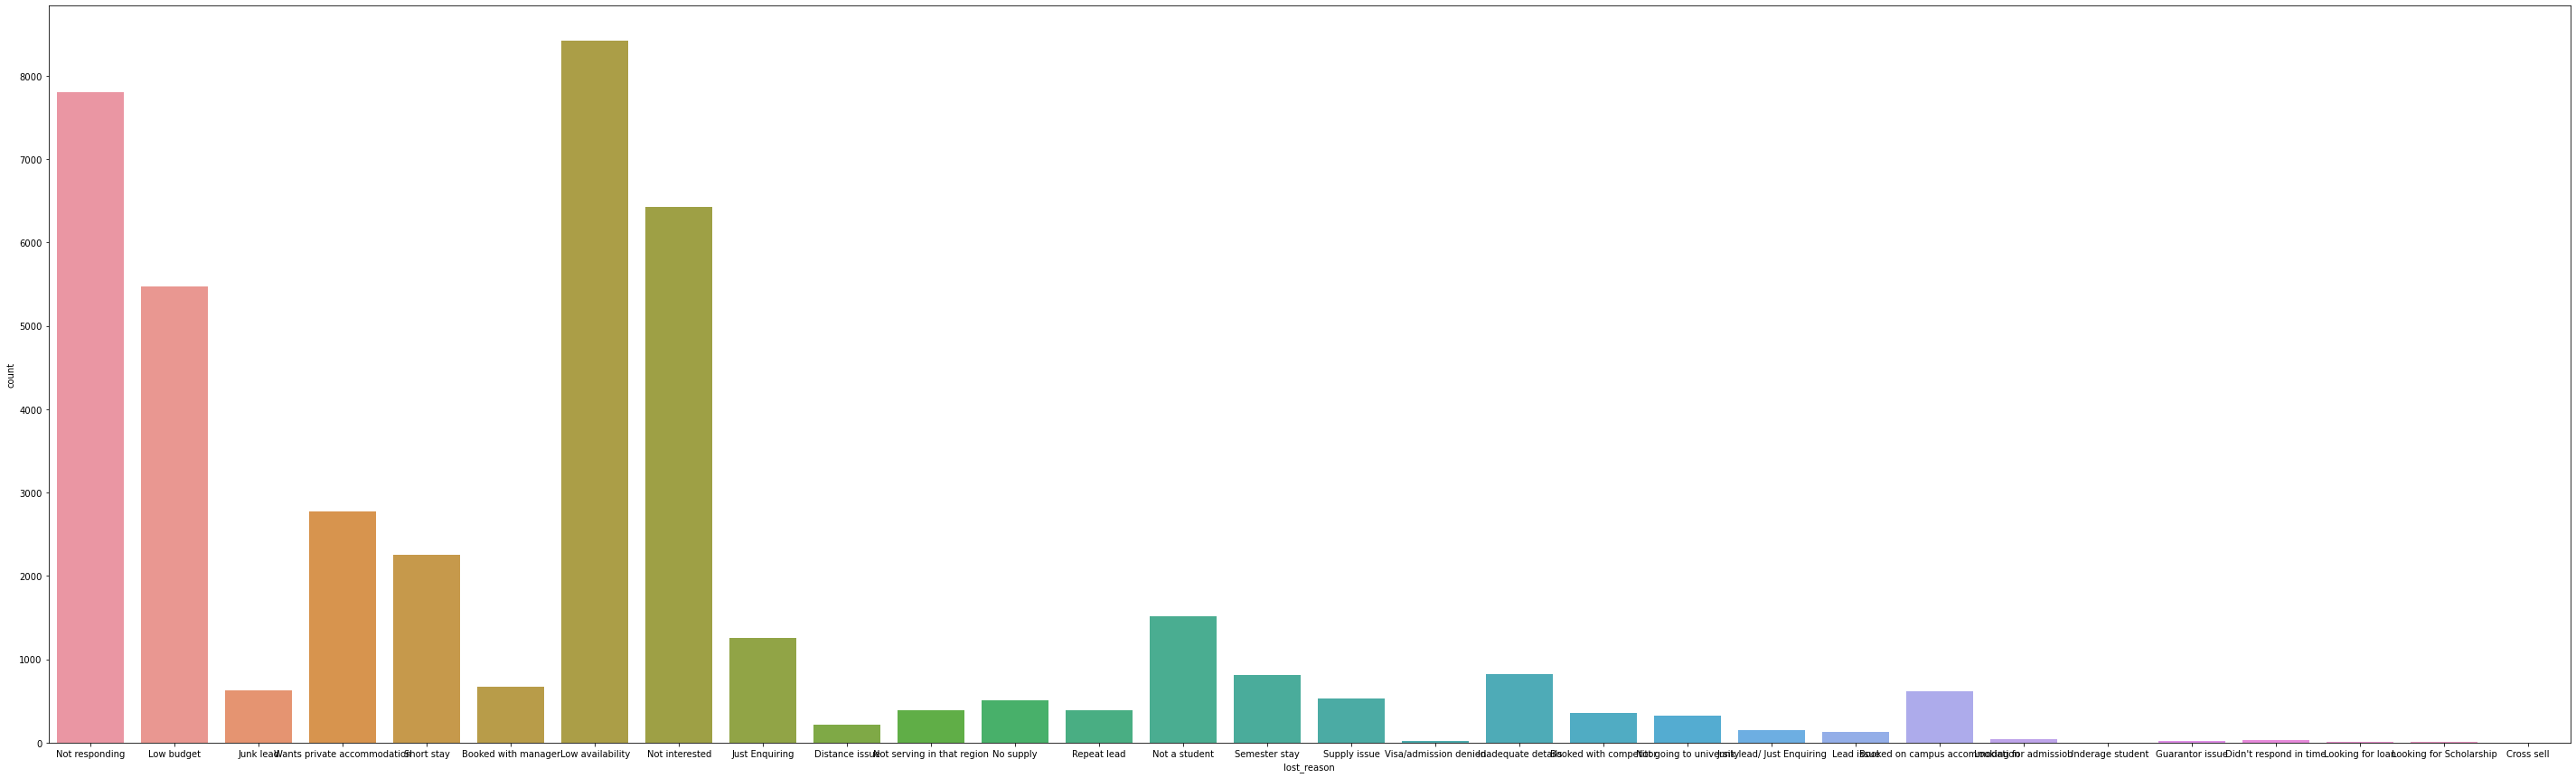

In [37]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(50, 15))
 

sns.countplot(data['lost_reason'],ax=ax)
plt.show()

In [38]:
data['lost_reason'] = data['lost_reason'].replace(np.nan, 'Low availability')

In [39]:
data['budget'].describe()

count                   42073
unique                   1840
top       £60 - £120 Per week
freq                     9678
Name: budget, dtype: object

In [40]:
data['budget'] = data['budget'].replace(np.nan, '£60 - £120 Per week')

In [41]:
data['utm_medium'].describe()

count                                                 42530
unique                                                   62
top       09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...
freq                                                  31164
Name: utm_medium, dtype: object

In [42]:
data['utm_medium'] = data['utm_medium'].replace(np.nan, '09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c')


In [43]:
data['lease'].describe()

count                                   43379
unique                                    309
top       Full Year Course Stay 40 - 44 weeks
freq                                    10907
Name: lease, dtype: object

In [44]:
data['lease'] = data['lease'].replace(np.nan, 'Full Year Course Stay 40 - 44 weeks')



In [45]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Unnamed: 0        0.00
Agent_id          0.00
status            0.00
lost_reason       0.00
budget            0.00
lease             0.00
movein            0.00
source            0.00
source_city       0.00
source_country    0.00
utm_source        0.13
utm_medium        0.00
des_city          0.00
des_country       0.00
room_type         0.00
lead_id           0.00
dtype: float64

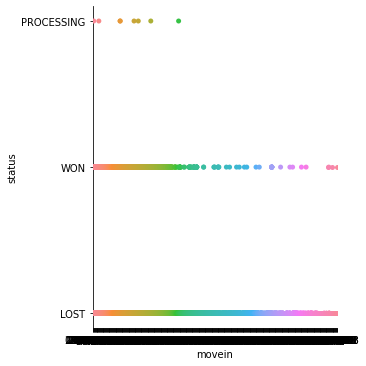

In [46]:
# drawing the plot


sns.catplot(data=data, x='movein', y='status')

plt.show()

In [48]:
data.drop(data[data['status'] == 'PROCESSING'].index, inplace = True)

In [47]:
# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

In [49]:
round(100*(data.isnull().sum()/len(data.index)), 2)


Unnamed: 0        0.0
Agent_id          0.0
status            0.0
lost_reason       0.0
budget            0.0
lease             0.0
movein            0.0
source            0.0
source_city       0.0
source_country    0.0
utm_source        0.0
utm_medium        0.0
des_city          0.0
des_country       0.0
room_type         0.0
lead_id           0.0
dtype: float64

## Exploratory Data Analysis

Status is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).

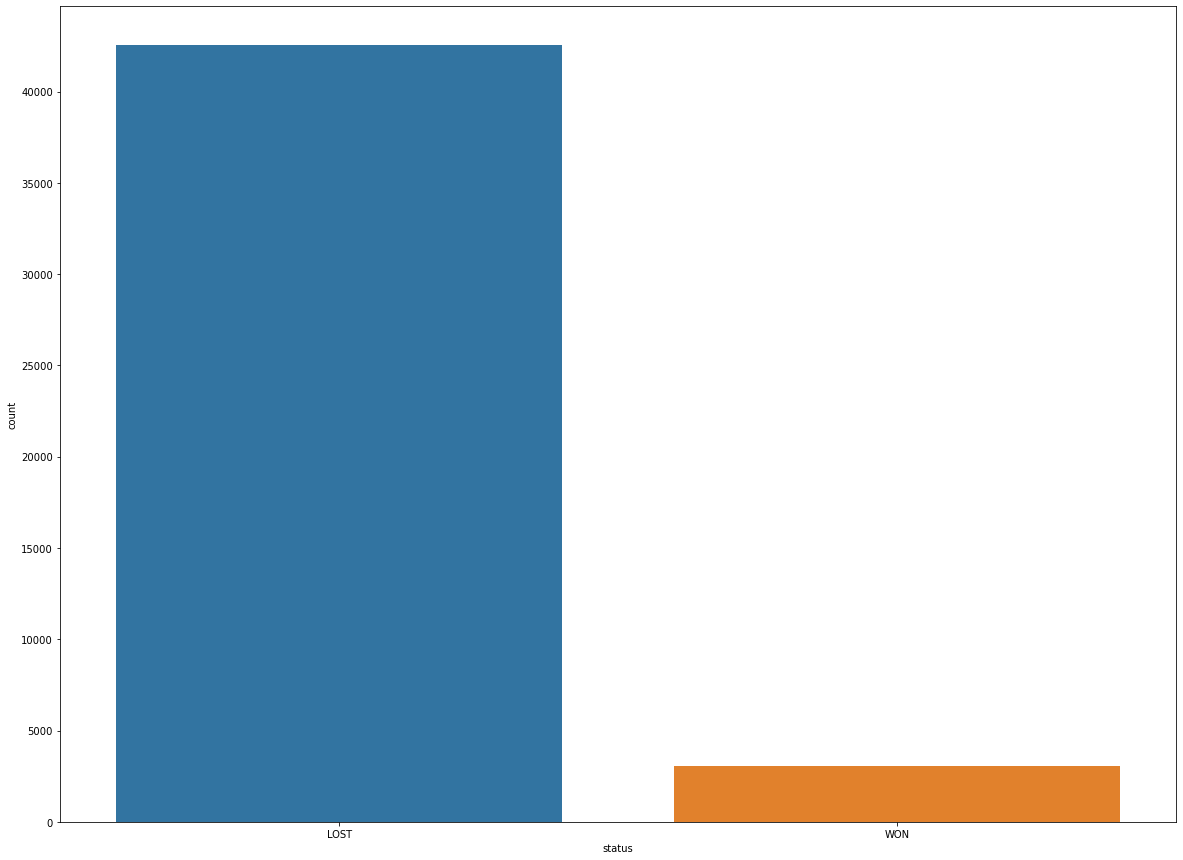

In [50]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 15))
 

sns.countplot(data['status'],ax=ax)
plt.show()

In [51]:
print("Size of the Dataset",data.shape)

Size of the Dataset (45597, 16)


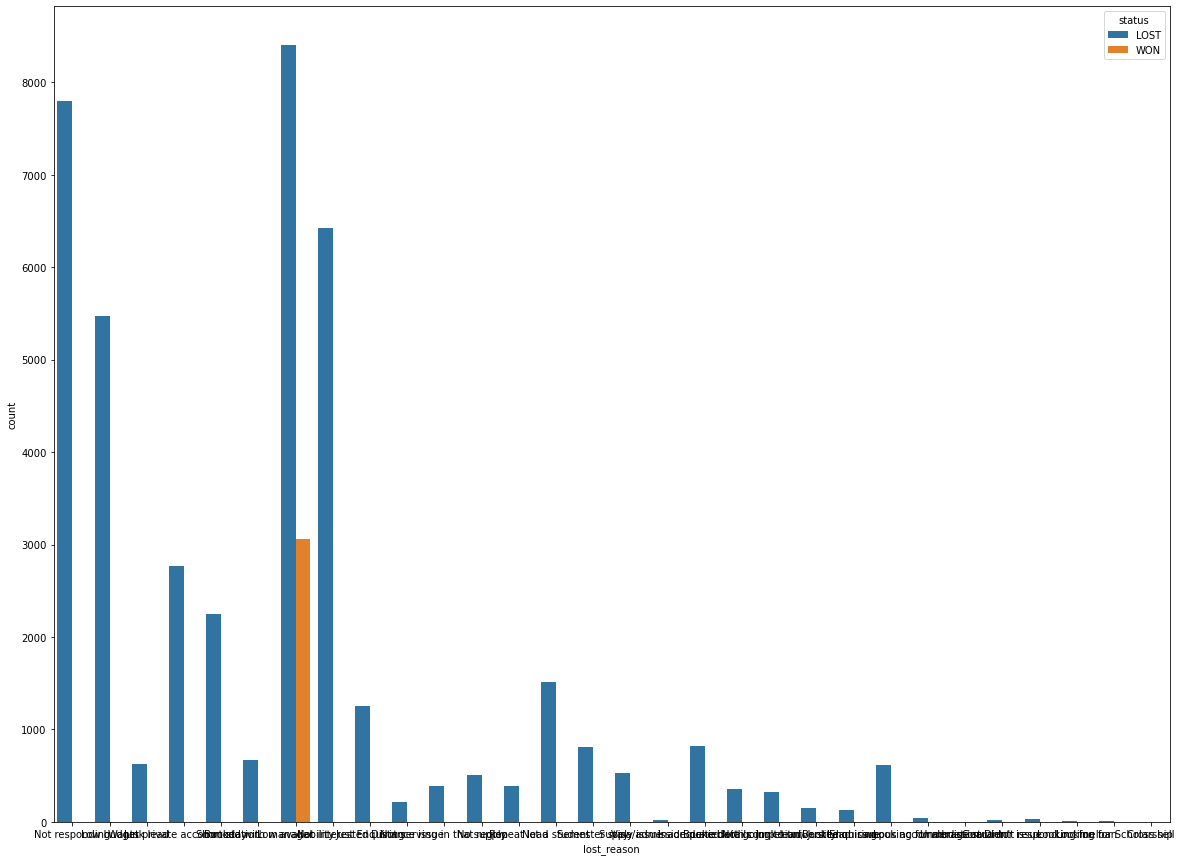

In [52]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x = "lost_reason", hue = "status", data = data,ax=ax)
plt.show()


## Creating a dummy variable for categorical variables 

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city','des_country','room_type']])
dummy1.head()

,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,budget_0-$20,budget_0-$250,budget_0-$400-500CAD,budget_0-$50,budget_0-$60 to $120,budget_0-$800,budget_0-0,budget_0-1,budget_0-1 lakh,budget_0-10,budget_0-10 lakhs,"budget_0-10,000 GBP PA",budget_0-100,budget_0-100 / 110 per week including all bills,budget_0-100 Euors,budget_0-100 Pounds,...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab

In [54]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153,des_country_80db4ccdca106d37b920206331fcfe3e9e50a9e763d89b54ce3ad5ac8cf30f03,des_country_8d23a6e37e0a6431a8f1b43a91

In [55]:
data = data.drop(['lost_reason','budget','lease','movein','source','source_city','source_country','utm_source','utm_medium','des_city','des_country','room_type'], axis = 1)

In [56]:
data.head()

,Unnamed: 0,Agent_id,status,lead_id,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,budget_0-$20,budget_0-$250,budget_0-$400-500CAD,budget_0-$50,budget_0-$60 to $120,budget_0-$800,budget_0-0,budget_0-1,budget_0-1 lakh,budget_0-10,budget_0-10 lakhs,"budget_0-10,000 GBP PA",...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153,des_country_80db4ccdca106d37b920206331fcfe3e9

In [57]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Unnamed: 0','Agent_id','lead_id','status'], axis=1)

In [58]:
X.head()

,lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,lost_reason_Junk lead,lost_reason_Junk lead/ Just Enquiring,lost_reason_Just Enquiring,lost_reason_Lead issue,lost_reason_Looking for Scholarship,lost_reason_Looking for admission,lost_reason_Looking for loan,lost_reason_Low availability,lost_reason_Low budget,lost_reason_No supply,lost_reason_Not a student,lost_reason_Not going to university,lost_reason_Not interested,lost_reason_Not responding,lost_reason_Not serving in that region,lost_reason_Repeat lead,lost_reason_Semester stay,lost_reason_Short stay,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,budget_0-,budget_0-$100,budget_0-$100 to $150 per week,budget_0-$100/week,budget_0-$20,budget_0-$250,budget_0-$400-500CAD,budget_0-$50,budget_0-$60 to $120,budget_0-$800,budget_0-0,budget_0-1,budget_0-1 lakh,budget_0-10,budget_0-10 lakhs,"budget_0-10,000 GBP PA",budget_0-100,budget_0-100 / 110 per week including all bills,budget_0-100 Euors,budget_0-100 Pounds,...,des_city_d42cbc9b98e696c84021832bb70307dd977776fc7eeaf1e323ce8c253a14a63a,des_city_d7cb811928ff389561b798c8d0882a9b974e279b14c493ead62ff8407a83438b,des_city_d882350bb60d500d38838b1198c2b3efc4d6e6a07aa3a64f923623ac339e0fd1,des_city_d96d14f5564eeb355178395b04cdb970c3dc8d01f54d1b7adf0288820457899c,des_city_dad114b6ed7342bac65c79575f6c7ff761ec26b52c1f5f7a9110532973d05df2,des_city_dffc5bb23bbf0e21f0dc08cadbc76cfe1ab8c5efe88f2377ba1906113a973c33,des_city_e016cccaca26467a2edc017658536f41ae5046ba943b6963cb01e640c2ada6a2,des_city_e34eb721eceb4f46181760c2f9b23b551419a518be82e693b9387b8496a9b98b,des_city_e452f0a3e6f3ab1c0a954908bb8a8866372fa4931a89deca50cbd103fc42e197,des_city_e509e9f3fb8f1e6b3cee0b3e924eb6e533928aeca836532c458ff60f606af025,des_city_e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,des_city_e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3bc2dd9e0854278b970,des_city_ea58dc05b968545d016953b84130933e920097afbf34431e837395905d39e0f8,des_city_ec3ae6550b9446364138461d6a682d09d101ac1a5ed8a9298e0a50869fd832f7,des_city_ec7166cc3735b44a4de38b649161092108f607aafa65b6953258bb10c22e3314,des_city_ecbd30f15c1f6ff0c031d33f1b65f06366194b590fbf0f955acca9caa08dcfae,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_city_ed7d5c58c916fa0799b0d609ed79a45e3b312549c951fcd0992f93891221f816,des_city_ef348bd17202c36d669d4bce1806ddaa5e33366880fc9865218048c62a2f87c4,des_city_ef6d625bd287131ad98e4ed57295037bb46e4864f9d6ef757e8e7cd5843366e3,des_city_f0f7d0f1dfaf96d3015a979080a4f8a1b7683a5b890c0e3ba456e16efadb5783,des_city_f19d051291d4364989e4e957ef610448af3e05863ee1b812738dd8ba78704bbf,des_city_f3966925d3b328c7fda7ebf6bc87747f2f15040ae6c16502a76d02e57003eb10,des_city_f4a95c80f4c35feff42a9f3830c6bfca4c0ea7bd43c6487fb2dc31eef7042736,des_city_f54f81405b9f63b0172b1598fe540c605e07ebd776ae11eb1637dfce9b883f8f,des_city_f618d9049cbfb9410ad8d47541218cc7a2a9e930750f593cbf5e1f68c3f27359,des_city_f85b65964d0cd041e8113f3b493abe0247f7f6d2b80762db183c09b1eae7e4f8,des_city_f92fd06da205d4b09f2683869528060f182275110babcbf20acd1c01c875e3c0,des_city_f9bfb92c288658941063ed2dfc7feca398a9df1623a428f5790d9818dc91297f,des_city_fb5c9d2cf0b916ef699ed346ada794721b2c9f5b20bcbd9b4fc556423c538677,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_2275583196d791405892aaca0d87743c872f3fc0cf3308a6c3ef82528918aa8a,des_country_3a386c13d283dc2ebbe2aeffc1ab3930d086b28956930d913d8dc58f34c013b7,des_country_49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,des_country_4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,des_country_5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab

In [59]:
# Putting response variable to y
y = data['status']

y.head()

0    LOST
1    LOST
2    LOST
3    LOST
4    LOST
Name: status, dtype: object

In [60]:
output=[]

for i in data['status']:
    if i == 'LOST' :
       i=0
       output.append(i) 
    else :
       i=1
       output.append(i) 
        
data['status']= output  

print(data['status'])

0        0
1        0
2        0
3        0
4        0
        ..
46603    0
46604    0
46605    0
46606    0
46607    0
Name: status, Length: 45597, dtype: int64


In [61]:
y= data['status']


In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [63]:
# Checking the Churn Rate
status = (sum(data['status'])/len(data['status'].index))*100
print(status)

6.7065815733491245


In [64]:
import statsmodels.api as sm

In [70]:
import requests

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [71]:
## Train the random forest model
num_estimators = 100
min_samples = 4

rf = RandomForestClassifier(n_estimators=num_estimators,
                            min_samples_split=min_samples)
rf.fit(X_train, y_train.ravel())

RandomForestClassifier(min_samples_split=4)

In [78]:
y_test_predicted = rf.predict(X_test)
    

accuracy = metrics.accuracy_score(y_test, y_test_predicted)
auc_score = metrics.roc_auc_score(y_test, y_test_predicted)


print(accuracy)
print(auc_score)


0.9706140350877193
0.7992431942821216


In [80]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_test_predicted))
print('F1 score:', f1_score(y_test, y_test_predicted))
print('Recall:', recall_score(y_test, y_test_predicted))
print('Precision:', precision_score(y_test, y_test_predicted))
print('\n clasification report:\n', classification_report(y_test,y_test_predicted))
print('\n confussion matrix:\n',confusion_matrix(y_test,y_test_predicted))



Accuracy: 0.9706140350877193
F1 score: 0.7287449392712552
Recall: 0.6020066889632107
Precision: 0.9230769230769231

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     12783
           1       0.92      0.60      0.73       897

    accuracy                           0.97     13680
   macro avg       0.95      0.80      0.86     13680
weighted avg       0.97      0.97      0.97     13680


 confussion matrix:
 [[12738    45]
 [  357   540]]
